In [1]:
from sklearn.datasets import load_svmlight_file
from sklearn.datasets import dump_svmlight_file
from liblinear.liblinearutil import *
from libsvm.svmutil import *
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import csv
import matplotlib.pyplot as plt

data = load_svmlight_file("/Users/omkarmanchekar/Desktop/Semester 1/Intro to Data Science/HW/HW3/covtype.libsvm.binary")

 
# raw=[]
# for j in range(581011):
#     a=[]
#     datanew = pd.DataFrame.sparse.from_spmatrix(data[0][j])
#     for i in range(54):
#         a.append(datanew[i][0])
#     a.append(data[1][j])
#     raw.append(a)


# header = list(range(55))
# data = raw

# with open('/Users/omkarmanchekar/Desktop/Semester 1/Intro to Data Science/HW/HW3/csv.csv', 'w', encoding='UTF8') as f:
#     writer = csv.writer(f)
#     writer.writerow(header)
#     writer.writerows(data)

In [2]:
dataset = pd.read_csv('/Users/omkarmanchekar/Desktop/Semester 1/Intro to Data Science/HW/HW3/csv.csv')
dataset

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581006,2401.0,157.0,21.0,90.0,15.0,120.0,238.0,238.0,119.0,830.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
581007,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
581008,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
581009,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<h2>Data is pre processed and scaled in range of [1,-1]</h2>

In [3]:
mean_data= dataset.mean()
std_data= dataset.std()
max_data = dataset.max()
min_data = dataset.min()

for i in range(54):
    dataset[str(i)] = (dataset[str(i)] - mean_data[i])/(max_data[i]-min_data[i])
    

dataset.head(10)

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,-0.181774,-0.290713,-0.168238,-0.008181,-0.059973,-0.258557,0.034858,0.034178,0.021542,0.599290,...,-0.090392,-0.077716,-0.002773,-0.003255,-0.000205,-0.000513,-0.026803,-0.023762,-0.01506,1.0
1,-0.184776,-0.276824,-0.183389,-0.041109,-0.067725,-0.275418,0.030921,0.045989,0.033353,0.591762,...,-0.090392,-0.077716,-0.002773,-0.003255,-0.000205,-0.000513,-0.026803,-0.023762,-0.01506,1.0
2,-0.077722,-0.046269,-0.077329,-0.001023,0.024007,0.116601,0.086039,0.057800,-0.029639,0.577263,...,-0.090392,-0.077716,-0.002773,-0.003255,-0.000205,-0.000513,-0.026803,-0.023762,-0.01506,2.0
3,-0.087227,-0.001824,0.059035,-0.019634,0.092482,0.103955,0.101787,0.057800,-0.080820,0.589810,...,-0.090392,-0.077716,-0.002773,-0.003255,-0.000205,-0.000513,-0.026803,-0.023762,-0.01506,2.0
4,-0.182274,-0.307380,-0.183389,-0.083342,-0.061265,-0.275278,0.030921,0.042052,0.029416,0.584373,...,-0.090392,-0.077716,-0.002773,-0.003255,-0.000205,-0.000513,-0.026803,-0.023762,-0.01506,1.0
5,-0.190278,-0.065713,-0.122783,0.021884,-0.079353,-0.320802,0.070291,0.053863,-0.009954,0.564716,...,-0.090392,-0.077716,-0.002773,-0.003255,-0.000205,-0.000513,-0.026803,-0.023762,-0.01506,2.0
6,-0.176772,-0.307380,-0.107632,0.000409,-0.053513,-0.241274,0.038795,0.006619,-0.017828,0.596083,...,-0.090392,-0.077716,-0.002773,-0.003255,-0.000205,-0.000513,-0.026803,-0.023762,-0.01506,1.0
7,-0.177272,-0.296269,-0.153086,-0.025360,-0.050929,-0.249705,0.038795,0.026304,0.005794,0.592180,...,-0.090392,-0.077716,-0.002773,-0.003255,-0.000205,-0.000513,-0.026803,-0.023762,-0.01506,1.0
8,-0.171269,-0.307380,-0.077329,-0.021066,0.012379,-0.236638,0.042732,-0.009129,-0.037513,0.594411,...,-0.090392,-0.077716,-0.002773,-0.003255,-0.000205,-0.000513,-0.026803,-0.023762,-0.01506,1.0
9,-0.173770,-0.268491,-0.062177,-0.016055,-0.045761,-0.240853,0.062417,-0.017003,-0.072946,0.592459,...,-0.090392,-0.077716,-0.002773,-0.003255,-0.000205,-0.000513,-0.026803,-0.023762,-0.01506,1.0


In [32]:
dump_svmlight_file(dataset.iloc[:,:53],dataset['54'].to_numpy(),f="/Users/omkarmanchekar/Desktop/Semester 1/Intro to Data Science/HW/HW3/data.binary")

<h2>Used liblinear (Primal and dual)</h2>

In [4]:
y, x = svm_read_problem('/Users/omkarmanchekar/Desktop/Semester 1/Intro to Data Science/HW/HW3/data.binary')

In [5]:
prob = problem(y[:10000], x[:10000])
param = parameter('-s 0 -q')
m = train(prob, param)
p_labels, p_acc, p_vals = predict(y[:10000], x[:10000], m)

Accuracy = 85.34% (8534/10000) (classification)


In [6]:
time(train(prob,param))

CPU times: user 40.4 ms, sys: 2.29 ms, total: 42.7 ms
Wall time: 39.6 ms


In [7]:
prob = problem(y[:10000], x[:10000])
param = parameter('-s 1 -q')
m = train(prob, param)
p_labels, p_acc, p_vals = predict(y[:10000], x[:10000], m)

Accuracy = 85.24% (8524/10000) (classification)


In [8]:
time(train(prob,param))

CPU times: user 105 ms, sys: 2.67 ms, total: 108 ms
Wall time: 106 ms


In [10]:
prob = problem(y[:10000], x[:10000])
param = parameter('-s 2 -q')
m = train(prob, param)
p_labels, p_acc, p_vals = predict(y[:10000], x[:10000], m)

Accuracy = 81.36% (8136/10000) (classification)


In [11]:
time(train(prob,param))

CPU times: user 5.29 ms, sys: 1.67 ms, total: 6.96 ms
Wall time: 4.37 ms


<h2>Used LibSVM</h2>

In [7]:
m = svm_train(y[:10000], x[:10000], '-t 2 -h 0')
p_label, p_acc, p_val = svm_predict(y[:10000], x[:10000], m)

..*
optimization finished, #iter = 2690
nu = 0.276393
obj = -2708.531141, rho = -0.308613
nSV = 2838, nBSV = 2704
Total nSV = 2838
Accuracy = 86.7% (8670/10000) (classification)


<h2>Applying PCA</h2>

In [14]:
pca = PCA(n_components=54,random_state=2020)
pca.fit(dataset)
pca.transform(dataset)

array([[ 9.22617370e-01,  4.28020582e-01, -4.87337134e-01, ...,
         7.52411011e-03, -5.07453079e-05, -3.61910634e-16],
       [ 9.19770559e-01,  4.29728740e-01, -4.79445254e-01, ...,
         1.19849547e-02, -4.77728843e-05, -4.17421785e-16],
       [ 7.76711903e-01, -4.81976163e-01,  4.15405079e-01, ...,
        -4.17868706e-04,  7.64162749e-06, -2.53742792e-17],
       ...,
       [-7.95443062e-01,  3.57711953e-01, -1.29941032e-01, ...,
        -2.33085255e-03,  2.03338253e-05,  1.48098068e-16],
       [-7.97009962e-01,  3.57681926e-01, -1.26894685e-01, ...,
        -2.93481863e-03,  1.85004367e-05,  1.48098068e-16],
       [-7.99749861e-01,  3.57872626e-01, -1.23069493e-01, ...,
        -2.64391725e-03,  1.80364695e-05,  1.20342493e-16]])

In [15]:
np.cumsum(pca.explained_variance_ratio_*100)

array([ 26.50077539,  39.61243426,  46.35521884,  52.37759586,
        57.86748856,  62.16865045,  66.3335247 ,  69.9020784 ,
        72.85168057,  75.46439874,  77.91477391,  79.90052704,
        81.83374698,  83.4665567 ,  85.05216397,  86.43663972,
        87.75511105,  88.96428688,  90.12630638,  91.18114642,
        92.1871134 ,  93.10848802,  93.8674458 ,  94.61109137,
        95.27151706,  95.87365636,  96.41389379,  96.84675426,
        97.22103298,  97.55705489,  97.85186857,  98.10516019,
        98.32522156,  98.53824645,  98.72575697,  98.8920046 ,
        99.03403645,  99.16989179,  99.29858584,  99.41993889,
        99.51801601,  99.61222609,  99.69942294,  99.77841882,
        99.8483531 ,  99.89838907,  99.93778198,  99.9630823 ,
        99.97843862,  99.98867875,  99.99764375,  99.9997416 ,
       100.        , 100.        ])

Text(0, 0.5, 'variance')

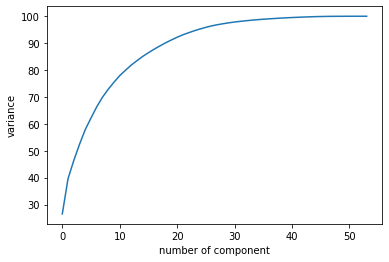

In [16]:
plt.plot(np.cumsum(pca.explained_variance_ratio_*100))
plt.xlabel("number of component")
plt.ylabel("variance")


In [17]:
pca = PCA(n_components=20)
pca.fit(dataset)
pca_data= pd.DataFrame(pca.transform(dataset))
pca_data


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.922617,0.428021,-0.487337,0.229150,0.303890,0.133835,0.121950,0.046986,-0.023763,0.156066,0.096503,0.014818,-0.168683,-0.015877,-0.206737,-0.325752,0.022380,-0.024662,-0.064944,-0.343282
1,0.919771,0.429729,-0.479445,0.235653,0.289636,0.136824,0.122687,0.042602,-0.021879,0.153795,0.092388,0.011662,-0.188666,-0.016015,-0.217614,-0.327534,0.035567,-0.031874,-0.085404,-0.344870
2,0.776712,-0.481976,0.415405,-0.392975,0.013552,-0.387864,-0.147123,-0.072513,-0.064410,0.780719,0.147943,0.033320,-0.040994,-0.068961,-0.083347,-0.285495,-0.028969,-0.026706,0.051710,-0.042685
3,0.765839,-0.423196,0.391046,-0.354158,-0.003127,-0.413798,-0.208159,-0.122354,-0.201361,-0.572074,0.317602,0.061426,0.148293,-0.014556,-0.033763,-0.468590,-0.003364,0.020836,0.041003,-0.166821
4,0.921856,0.430623,-0.479735,0.225514,0.316434,0.143270,0.128141,0.039888,-0.019540,0.149120,0.085251,0.013075,-0.194531,-0.015283,-0.219085,-0.330388,0.042759,-0.040880,-0.109559,-0.336770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581006,-0.797628,0.358167,-0.129867,0.052853,0.211250,0.029405,-0.054507,-0.186017,0.082286,-0.027153,0.045059,0.033830,-0.421748,-0.078269,-0.082799,-0.094117,0.142194,0.007374,0.005252,-0.028006
581007,-0.796243,0.357654,-0.130891,0.046969,0.222894,0.031144,-0.050383,-0.185585,0.083003,-0.026123,0.044087,0.032777,-0.422186,-0.077507,-0.082474,-0.095988,0.145400,0.006180,0.004005,-0.029134
581008,-0.795443,0.357712,-0.129941,0.045033,0.223739,0.032675,-0.048174,-0.187460,0.084143,-0.024923,0.041954,0.031840,-0.425541,-0.076274,-0.084030,-0.100774,0.152096,0.002570,-0.005157,-0.030315
581009,-0.797010,0.357682,-0.126895,0.054099,0.188489,0.029970,-0.050439,-0.191935,0.085629,-0.017797,0.041226,0.028037,-0.426750,-0.073448,-0.083751,-0.106095,0.161789,-0.001229,-0.008388,-0.036696


<h2>SVM after using PCA</h2>

In [18]:
dump_svmlight_file(pca_data,dataset['54'].to_numpy(),f="/Users/omkarmanchekar/Desktop/Semester 1/Intro to Data Science/HW/HW3/pca_data.binary")

In [16]:

Y, X = svm_read_problem('/Users/omkarmanchekar/Desktop/Semester 1/Intro to Data Science/HW/HW3/pca_data.binary')

In [17]:
prob = problem(Y, X)
param = parameter('-s 0 -q')
m = train(prob, param)
p_labels, p_acc, p_vals = predict(Y, X, m)

Accuracy = 100% (581011/581011) (classification)


In [18]:
time(train(prob,param))

CPU times: user 344 ms, sys: 16.1 ms, total: 360 ms
Wall time: 363 ms


In [19]:
prob = problem(Y, X)
param = parameter('-s 1 -q')
m = train(prob, param)
p_labels, p_acc, p_vals = predict(Y, X, m)

Accuracy = 99.7213% (579392/581011) (classification)


In [20]:
time(train(prob,param))

CPU times: user 1.57 s, sys: 34.5 ms, total: 1.6 s
Wall time: 1.62 s


In [24]:
prob = problem(Y, X)
param = parameter('-s 2 -q')
m = train(prob, param)
p_labels, p_acc, p_vals = predict(Y, X, m)

Accuracy = 99.5771% (578554/581011) (classification)


In [15]:
time(train(prob,param))

CPU times: user 348 ms, sys: 16.6 ms, total: 364 ms
Wall time: 374 ms


In [25]:
m = svm_train(Y[:10000], X[:10000], '-t 2 -h 0')
p_label, p_acc, p_val = svm_predict(Y[:10000], X[:10000], m)

*
optimization finished, #iter = 708
nu = 0.004941
obj = -24.741693, rho = -0.106305
nSV = 84, nBSV = 21
Total nSV = 84
Accuracy = 100% (10000/10000) (classification)
